<a href="https://colab.research.google.com/github/SpyChicken00/A-Computational-Approach-to-Language-Learning-Models/blob/main/DuolingoDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/learning_traces.13m.csv"

'/content/drive/My Drive/learning_traces.13m.csv'


In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/learning_traces.13m.csv')
print(data.head())

   p_recall   timestamp     delta user_id learning_language ui_language  \
0       1.0  1362076081  27649635    u:FO                de          en   
1       0.5  1362076081  27649635    u:FO                de          en   
2       1.0  1362076081  27649635    u:FO                de          en   
3       0.5  1362076081  27649635    u:FO                de          en   
4       1.0  1362076081  27649635    u:FO                de          en   

                          lexeme_id                     lexeme_string  \
0  76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
1  7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
2  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
3  0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
4  84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   

   history_seen  history_correct  session_seen  session_correct  
0             6                4            

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

# Load dataset
titanic = sns.load_dataset('titanic')

#pd.Series([1, 90, 'hey', np.nan], index=['a', 'B', 'C', 'd'])
#pd.DataFrame({'day': [17, 30], 'month': [1, 12], 'year': [2010, 2017]})
duolingo = pd.read_csv('/content/drive/My Drive/learning_traces.13m.csv')
#print(data.head())
duolingo.describe()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
count,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07,1.285423e+07
mean,8.961056e-01,1.362589e+09,7.295811e+05,2.198109e+01,1.935025e+01,1.817686e+00,1.644134e+00
std,2.714048e-01,2.932082e+05,2.246499e+06,1.295508e+02,1.119681e+02,1.360180e+00,1.318794e+00
min,0.000000e+00,1.362076e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.362343e+09,5.320000e+02,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.362591e+09,7.713400e+04,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.362846e+09,4.425070e+05,1.500000e+01,1.300000e+01,2.000000e+00,2.000000e+00
max,1.000000e+00,1.363105e+09,4.032836e+07,1.351800e+04,1.288800e+04,2.000000e+01,2.000000e+01


In [17]:
duolingo.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [ ]:
duolingo["ui_language"].value_counts()

en    7839435
es    3641179
pt     949460
it     424152
Name: ui_language, dtype: int64

In [ ]:
duolingo["learning_language"].value_counts()

en    5014791
es    3407689
fr    1873734
de    1452597
it     793935
pt     311480
Name: learning_language, dtype: int64

<Axes: xlabel='session_seen', ylabel='session_correct'>

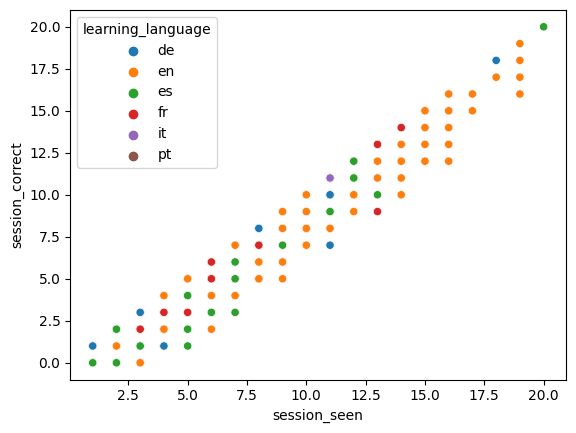

In [9]:
import seaborn as sns
sample = duolingo.sample(100000)
sns.scatterplot(data=sample, x="session_seen", y="session_correct", hue = "learning_language")
#Comparing general seen to session correct

#compare each language


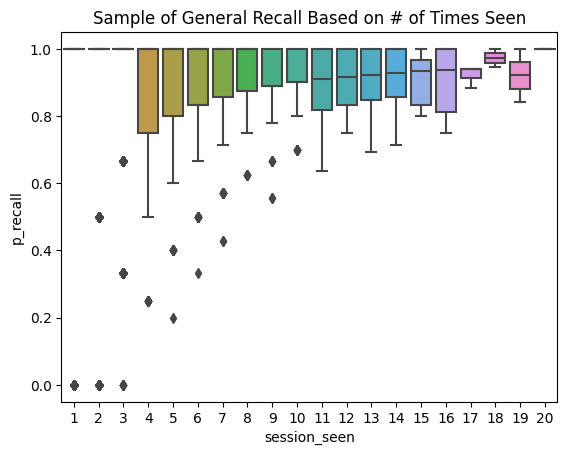

In [10]:
import matplotlib.ticker as ticker

bar = sns.boxplot(data=sample, x="session_seen", y="p_recall").set(title="Sample of General Recall Based on # of Times Seen")
#bar.set_ylim(0, 6000)
#bar.xaxis.set_major_locator(ticker.LinearLocator(10))
#trying different types of graphs


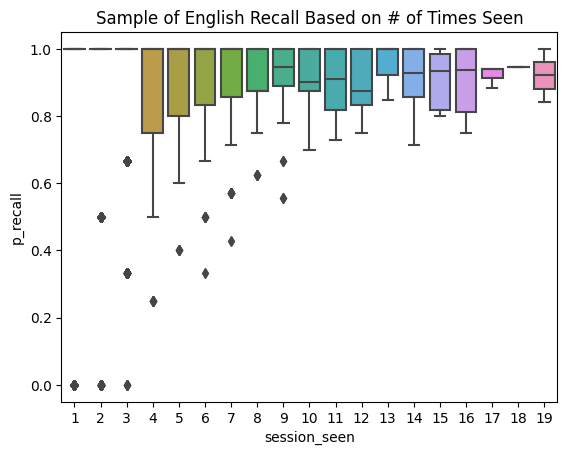

In [11]:
en_sample = sample[sample['learning_language'] == 'en']
box = sns.boxplot(data=en_sample, x="session_seen", y="p_recall").set(title="Sample of English Recall Based on # of Times Seen")


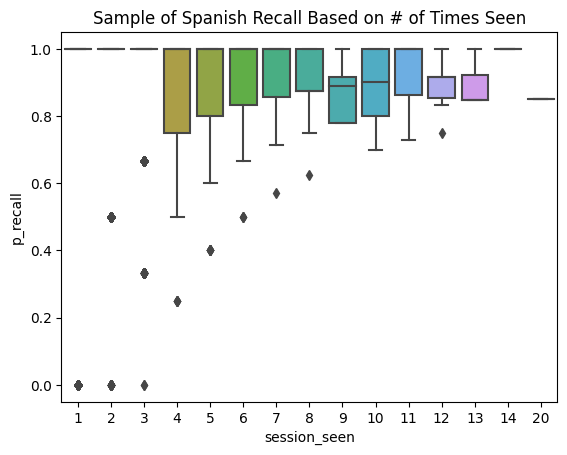

In [ ]:
es_sample = sample[sample['learning_language'] == 'es']
box = sns.boxplot(data=es_sample, x="session_seen", y="p_recall").set(title="Sample of Spanish Recall Based on # of Times Seen")

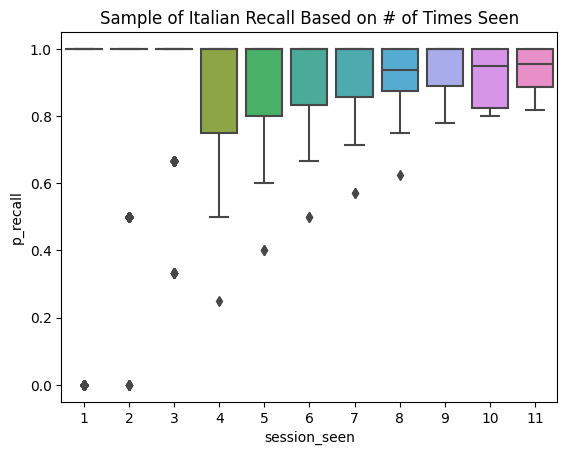

In [ ]:
it_sample = sample[sample['learning_language'] == 'it']
box = sns.boxplot(data=it_sample, x="session_seen", y="p_recall").set(title="Sample of Italian Recall Based on # of Times Seen")

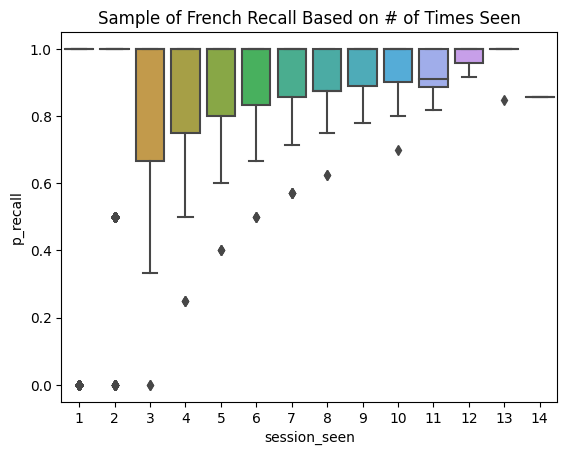

In [ ]:
fr_sample = sample[sample['learning_language'] == 'fr']
box = sns.boxplot(data=fr_sample, x="session_seen", y="p_recall").set(title="Sample of French Recall Based on # of Times Seen")

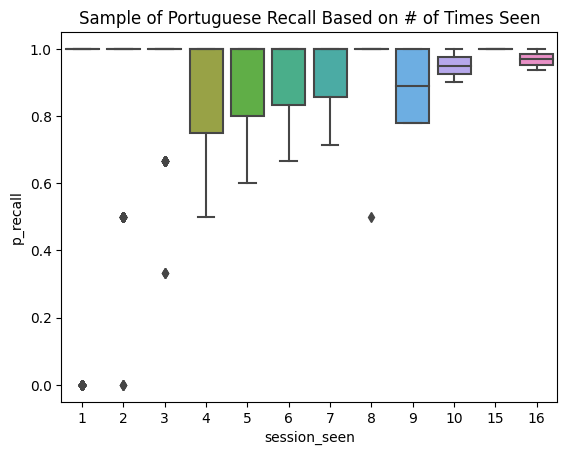

In [ ]:
pt_sample = sample[sample['learning_language'] == 'pt']
box = sns.boxplot(data=pt_sample, x="session_seen", y="p_recall").set(title="Sample of Portuguese Recall Based on # of Times Seen")

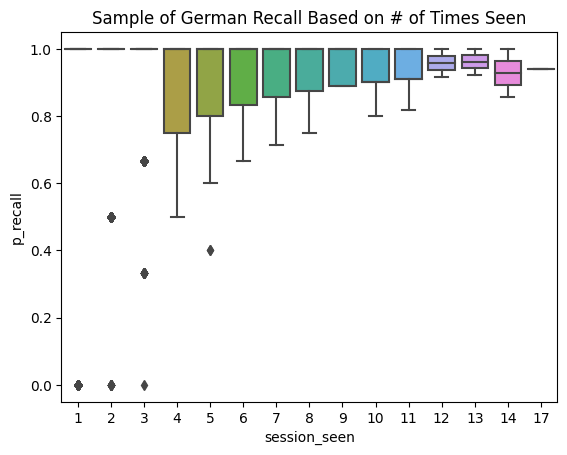

In [ ]:
de_sample = sample[sample['learning_language'] == 'de']
box = sns.boxplot(data=de_sample, x="session_seen", y="p_recall").set(title="Sample of German Recall Based on # of Times Seen")

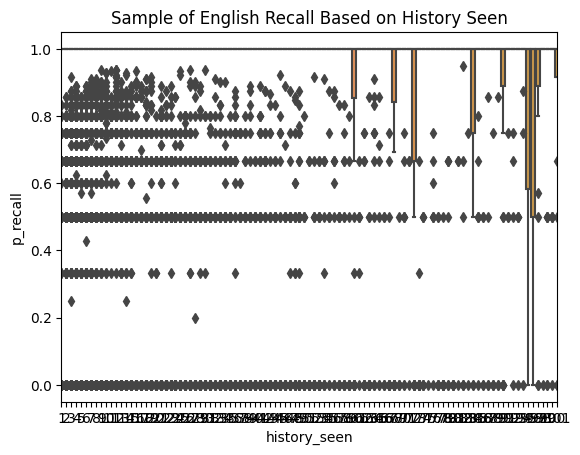

In [ ]:
sample = sample[sample['learning_language'] == 'en']
box = sns.boxplot(data=en_sample, x="history_seen", y="p_recall").set(title="Sample of English Recall Based on History Seen", xlim=(0,100))

#how to clean this up?
#showing that there is more variation after having seen it too many times, not remembering?

In [14]:
en_sample.dtypes

p_recall             float64
timestamp              int64
delta                  int64
user_id               object
learning_language     object
ui_language           object
lexeme_id             object
lexeme_string         object
history_seen           int64
history_correct        int64
session_seen           int64
session_correct        int64
dtype: object

(0.0, 50.0)

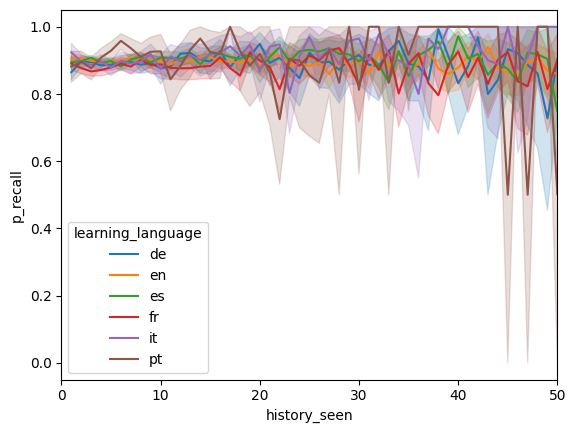

In [18]:
box = sns.lineplot(data=sample, x="history_seen", y="p_recall", hue='learning_language')
box.set_xlim(0, 50)

test

sample = duolingo.sample(1000)
boxplot, try using different visualizations
check different languages, more effective for one or other?
can use chatgpt, github copilot, check datamining website for examples on codi

